In [1]:
# Importar dependências
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('precision', 2)

# Criando o objeto modelo e variável para indicar a pasta com os dados
data_path = '../../input/bes/v1/'
geo_model = gp.create_model('BES_v1')

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
# Inicializando os dados, a extensão e a resolução do modelo.
gp.init_data(geo_model,
             extent=[386000, 485000, 7810000, 7950000, -8000, 500],
             resolution=[100, 100, 50],
             path_i=data_path + "surfaces_points.csv",
             path_o=data_path + "orientations_points.csv")

Active grids: ['regular']


BES_v1  2023-05-11 15:03

In [3]:
geo_model.additional_data

values
Structure isLith                                                   True
          isFault                                                 False
          number faults                                               0
          number surfaces                                             6
          number series                                               2
          number surfaces per series                             [6, 0]
          len surfaces surface_points             [15, 7, 15, 12, 8, 8]
          len series surface_points                             [65, 0]
          len series orientations                                [6, 0]
Options   dtype                                                 float64
          output                                                geology
          theano_optimizer                                 fast_compile
          device                                                    cpu
          verbosity                                                None
Kriging   range                                               171677.75
          $C_o$                                            701744047.62
          drift equations                                        [3, 3]
Rescaling rescaling factor                                     214190.6
          centers                      [436298.75, 7873961.35, -2391.5]

In [4]:
geo_model.get_data()

X         Y     Z    smooth     surface       G_x  \
surface_points 0   425873.0  7.93e+06   -38  2.00e-06    RIO_DOCE       NaN   
               6   436301.0  7.83e+06   -52  2.00e-06    RIO_DOCE       NaN   
               11  417780.5  7.82e+06   -43  2.00e-06    RIO_DOCE       NaN   
               15  438482.9  7.91e+06   -62  2.00e-06    RIO_DOCE       NaN   
               19  426449.0  7.84e+06   -47  2.00e-06    RIO_DOCE       NaN   
...                     ...       ...   ...       ...         ...       ...   
orientations   1   438482.9  7.91e+06 -1280  1.00e-02   CARAVELAS  1.00e-12   
               2   427132.3  7.82e+06 -1607  1.00e-02   URUCUTUCA  1.00e-12   
               4   426449.0  7.84e+06 -3546  1.00e-02    REGENCIA  1.00e-12   
               3   431122.8  7.88e+06 -3851  1.00e-02  SAO_MATEUS  1.00e-12   
               5   429623.0  7.92e+06 -3080  1.00e-02    MARIRICU  1.00e-12   

                        G_y  G_z  
surface_points 0        NaN  NaN  
               6        NaN  NaN  
               11       NaN  NaN  
               15       NaN  NaN  
               19       NaN  NaN  
...                     ...  ...  
orientations   1   1.75e-02  1.0  
               2   1.00e-12  1.0  
               4   1.00e-12  1.0  
               3   1.00e-12  1.0  
               5   1.00e-12  1.0  

[71 rows x 8 columns]

In [5]:
gp.get_data(geo_model, 'surface_points').head()

,X,Y,Z,smooth,surface
0,425873.0,7.93e+06,-38,2.00e-06,RIO_DOCE
6,436301.0,7.83e+06,-52,2.00e-06,RIO_DOCE
11,417780.5,7.82e+06,-43,2.00e-06,RIO_DOCE
15,438482.9,7.91e+06,-62,2.00e-06,RIO_DOCE
19,426449.0,7.84e+06,-47,2.00e-06,RIO_DOCE


In [6]:
gp.get_data(geo_model, 'orientations').head()

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,425873.0,7.93e+06,-38,1.00e-12,1.00e-12,1.0,0.01,RIO_DOCE
1,438482.9,7.91e+06,-1280,1.00e-12,1.75e-02,1.0,0.01,CARAVELAS
2,427132.3,7.82e+06,-1607,1.00e-12,1.00e-12,1.0,0.01,URUCUTUCA
4,426449.0,7.84e+06,-3546,1.00e-12,1.00e-12,1.0,0.01,REGENCIA
3,431122.8,7.88e+06,-3851,1.00e-12,1.00e-12,1.0,0.01,SAO_MATEUS


In [7]:
gp.get_data(geo_model, 'series')

,order_series,BottomRelation,isActive,isFault,isFinite
Default series,1,Erosion,True,False,False
Basement,2,Erosion,False,False,False


In [8]:
gp.get_data(geo_model, 'surfaces')

,surface,series,order_surfaces,color,id
0,RIO_DOCE,Default series,1,#015482,1
1,CARAVELAS,Default series,2,#9f0052,2
2,URUCUTUCA,Default series,3,#ffbe00,3
3,REGENCIA,Default series,4,#728f02,4
4,SAO_MATEUS,Default series,5,#443988,5
5,MARIRICU,Default series,6,#ff3f20,6
6,basement,Basement,1,#5DA629,7


In [4]:
geo_model.delete_surface_points_basement()

True

In [5]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(geo_model,                         
                         {"Strat_Series_1": ('RIO_DOCE', 
                                             'CARAVELAS',
                                             'URUCUTUCA',
                                             'REGENCIA',
                                             'SAO_MATEUS',
                                             'MARIRICU',),
                          "Basement_series": ('basement')})

# Ver o grid do modelo
geo_model.grid

Grid Object. Values: 
array([[ 3.86495e+05,  7.81070e+06, -7.91500e+03],
       [ 3.86495e+05,  7.81070e+06, -7.74500e+03],
       [ 3.86495e+05,  7.81070e+06, -7.57500e+03],
       ...,
       [ 4.84505e+05,  7.94930e+06,  7.50000e+01],
       [ 4.84505e+05,  7.94930e+06,  2.45000e+02],
       [ 4.84505e+05,  7.94930e+06,  4.15000e+02]])

In [ ]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(geo_model,                         
                         {"Strat_Series_1": ('RIO_DOCE', 'CARAVELAS'),
                          "Strat_Series_2": ('URUCUTUCA', 'REGENCIA'),
                          "Strat_Series_3": ('SAO_MATEUS'),
                          "Strat_Series_4": ('MARIRICU'),
                          "Basement_series": ('basement')})

# Ver o grid do modelo
geo_model.grid

In [6]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,RIO_DOCE,Strat_Series_1,1,#015482,1
1,CARAVELAS,Strat_Series_1,2,#9f0052,2
2,URUCUTUCA,Strat_Series_1,3,#ffbe00,3
3,REGENCIA,Strat_Series_1,4,#728f02,4
4,SAO_MATEUS,Strat_Series_1,5,#443988,5
5,MARIRICU,Strat_Series_1,6,#ff3f20,6
6,basement,Basement_series,1,#5DA629,7


In [7]:
geo_model.set_default_orientation()

In [7]:
geo_model.rescaling

,values
rescaling factor,214190.6
centers,"[436298.75, 7873961.35, -2391.5]"


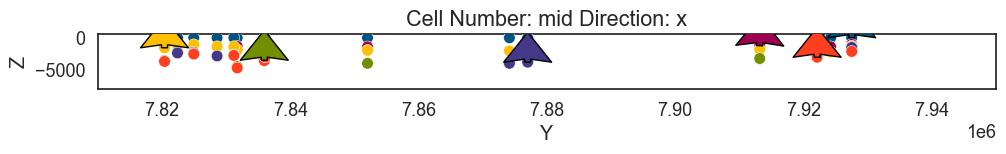

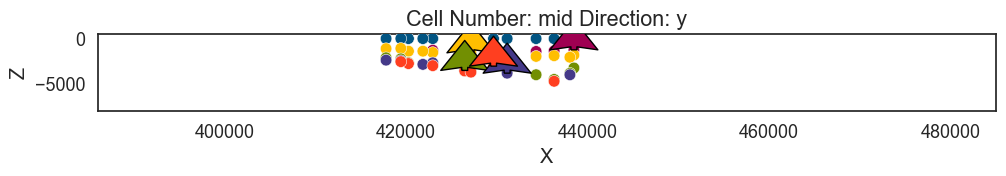

In [8]:
# Ver em 2D os dados nas 3 direções
gp.plot_2d(geo_model, direction=['x'], show_data=True, show_boundaries=True, legend=False, show=True)

gp.plot_2d(geo_model, direction=['y'], show_data=True, show_boundaries=True, legend=False, show=True)

#gp.plot_2d(geo_model, direction=['z'], show_data=True)

In [8]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, plotter_type='basic', image=False, show_data=True, show_surfaces=True, show_scalar=True, show_boundaries=True)

[1000. 5000.]
Active grids: ['regular' 'topography']


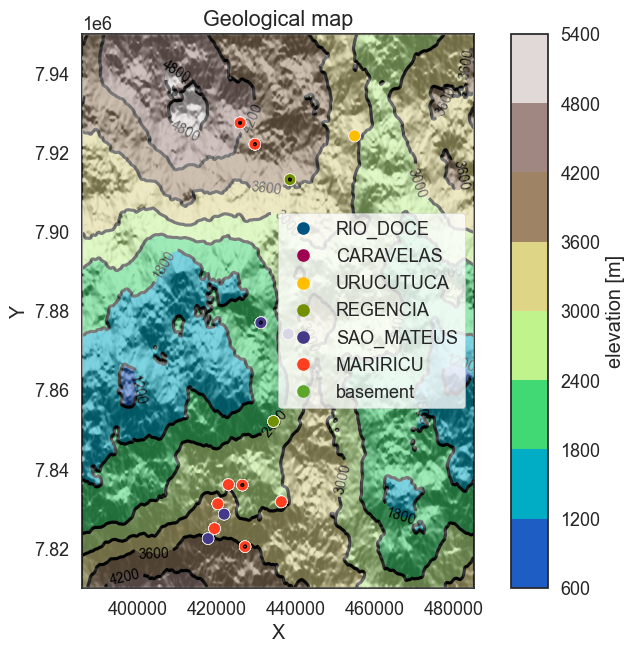

In [16]:
# Adicionar uma topografia randômica 
geo_model.set_topography(source='random')
gp.plot_2d(geo_model, show_topography=True, section_names=['topography'])
plt.show()

In [10]:
%%time
# Interpolador
gp.set_interpolator(geo_model,
                    theano_optimizer='fast_run',
                    compile_theano=True
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range               171677.75
$C_o$            701744047.62
drift equations        [3, 3]
Wall time: 14.2 s


In [11]:
%%time
# Computar a solução do modelo
sol = gp.compute_model(geo_model, compute_mesh=True)

Wall time: 5.37 s


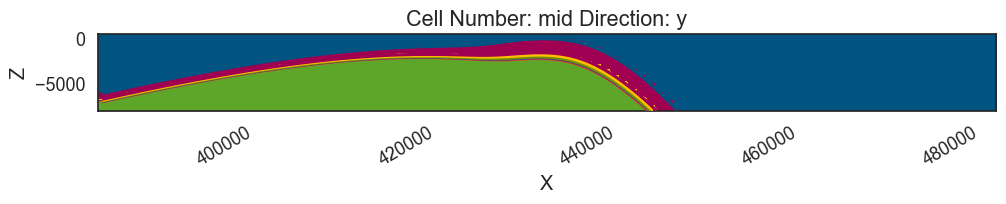

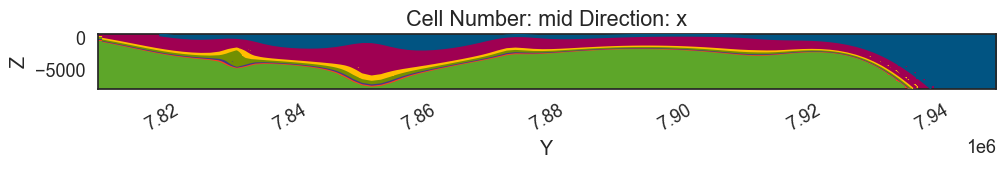

In [12]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="x", show_data=False, show_lith=True)

In [14]:
# Visualizar o modelo em 3D
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=True, show_results=True, show_lith=True, show_boundaries=True)

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(geo_model, path="../../output/Lake_PreSal/v6/", compress=True)